# Introduction

The purpose of this project is to perform an exploratory data analysis (EDA) to understand the customer behavior and improve the customer retention of a telecommunications company. The data was shared by IBM Watson Analytics [(see the source page here)](https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/), and also available from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn). 

### Proposed Aim

The source page contains a short description of the aim of the project as follows:

>A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.



### Additional Aim

In addition to the proposed aim, stakeholders might be interested to know where the major revenue comes from, and what incentives they can offer to potential customers in order to increase customer retention and the revenue.

### Analysis Framework

The following questions will serve as a framework to analyze the data set and to provide business insights.

1. Churn-based Analysis
    1. Who is likely to churn?
    2. What behavior and characteristics can we learn from the churned customers?
    3. What features differentiates the churned customers from the current customers?


2. Revenue-based Analysis
    1. Who is the most valuable customers?
    2. Which features do they likely to have?
   
   
3. Recommendations: What can we do to
    1. Reduce the churn-prone customers?
    2. Maintain and maximize the most valuable customers?


### Data Description

The source data provides a brief description of the data:

>The data set includes information about:
>- Customers who left within the last month – the column is called Churn
>- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
>- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
>- Demographic info about customers – gender, age range, and if they have partners and dependents



### Understanding the Data

Let's first take a look at the data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Getting the number of rows and columns
print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))

Number of rows: 7043, number of columns: 21


### Data Cleansing
Let's make sure we don't have missing values.

In [5]:
# Getting the number of missing values in each columns
np.sum(df.isnull())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No NaN values. It looks like this is a clean data set, but something doesn't look right. Let's take a look at the data types.

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Strangely, the "TotalCharges" column is of an "object" data type, not a float64. A visual inspection shows that some cells in "TotalCharges" contain a space character (" "). Let's see what these rows are.

In [6]:
df.loc[df["TotalCharges"] == " "] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


It turns out that all of the "tenure" column (the number of months customer received the service) are zero for rows where the "TotalCharges" is a space character. I assume that the total charges is assigned a space character when "tenure" is zero because the total charge is calculated as:

    TotalCharges = MonthlyCharges * tenure 

I don't want to eliminate these entries, as they are a subgroup of the target. Instead, I will substitute the missing values with zero, as the total charges for these customers should be very small. This is because these customers terminated the service in less than a month, and therefore, their total charge is a fraction of their monthly charge. 

In [3]:
df["TotalCharges"].replace(' ', 0.0, inplace=True) # Replacing a space character (" ") with 0.0 in the "TotalCharges" column 

In [4]:
TotalCharges = pd.to_numeric(df["TotalCharges"]) # Convert the "TotalCharges" to float64...

In [5]:
df["TotalCharges"] = TotalCharges # ... and substitute.

In [6]:
df["SeniorCitizen"].replace({0:"No", 1:"Yes"}, inplace=True) # Replacing 0/1 with No/Yes

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now the "TotalCharges" is float64. Next, let's check the distribution of the churned customers vs the current customers.

In [13]:
# Getting the counts for the number of churned customers vs the current customers
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

The current customers outnumber the churned customers by a significant margin; this is an imbalanced data. We should remember that this imbalance makes the relative comparison between the two groups misleading (in terms of their absolute counts) (i.e. 10% of the churned group is smaller than 5% of the current customers (187 customers vs 259 customers, respectively.)

### Revenue Based Analysis
Let's start by understanding the revenue source. A deeper understanding of the revenue and the corresponding customer segments can lead to effective business strategies. We will look at the "TotalCharges" column, and break it down by customer segments.

#### Who are the most valuable customers?
First, let's see how much revenue comes from each of the customers by services subscribed. It's reasonable to assume that customer benavior between different service segments to be quite different. Just imagine what it would be like to lose a phone versus losing a phone, the Internet, and the TV connections altogether for a couple of days. Customers with different services have different levels of incentive to stay with the company, and how much they are willing to pay for the services. 

In [61]:
revenue_services = []
revenue_services_labels = []

# Phone service only customers
revenue_services.append(df[(df["InternetService"] == "No") & (df["PhoneService"] == "Yes")]["TotalCharges"].sum())
revenue_services_labels.append("Phone Only")

# Internet service only customers
revenue_services.append(df[(df["InternetService"] != "No") & (df["PhoneService"] == "No")]["TotalCharges"].sum())
revenue_services_labels.append("Internet Only")

# Phone  and Internet customers
revenue_services.append(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes")]["TotalCharges"].sum())
revenue_services_labels.append("Phone and Internet")

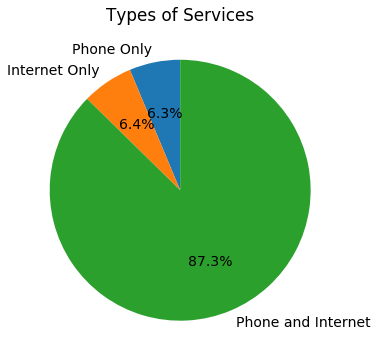

In [62]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [10, 6]})
fig = plt.figure()

ax = fig.add_subplot(111)
ax.pie(revenue_services, labels=revenue_services_labels, startangle=90, autopct='%1.1f%%')
ax.set_title("Types of Services")
plt.savefig("1_RevenueBySegment.png")
plt.show()

This is quite interesting. Almost 90% of the revenue comes from the customers who subscribe to both phone and the Internet service. Retaining the customers with phone and the Internet services is of utmost importance.

### Who is most likely to churn?

To answer this question, we will compare the data distribution between two groups: the churned customers and the current customers. To make the comparison easy to understand, we will group the comparison by the same data class (demographic, account information, and services).

In [11]:
# Phone service only customers
service_churn_percent = []
service_churn_labels = []
values = df[(df["InternetService"] == "No") & (df["PhoneService"] == "Yes")]["Churn"].value_counts()
service_churn_percent.append(values[1] / (values[0] + values[1]) * 100.0)
service_churn_labels.append("Phone Only") 

# Internet service only customers
values = df[(df["InternetService"] != "No") & (df["PhoneService"] == "No")]["Churn"].value_counts()
service_churn_percent.append(values[1] / (values[0] + values[1]) * 100.0)
service_churn_labels.append("Internet Only")

# Phone and Internet customers
values = df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes")]["Churn"].value_counts()
service_churn_percent.append(values[1] / (values[0] + values[1]) * 100.0)
service_churn_labels.append("Phone and Internet")


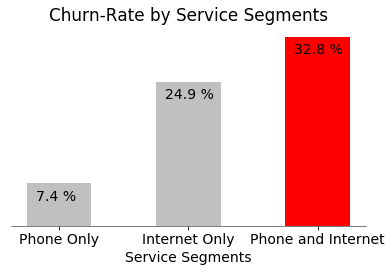

In [42]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [6, 4]})
fig = plt.figure()
ax = fig.add_subplot(111)
idx = [1, 2, 3]
bar_width = 0.5
ax.bar(idx, service_churn_percent, bar_width, color=["silver", "silver", "red"])
for i, v in enumerate(service_churn_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.82 , v - 3, value)
ax.set_xticks(idx)
ax.set_xticklabels(service_churn_labels)
ax.set_xlabel("Service Segments")
# ax.set_ylabel("Churn-Rate (%)")
ax.set_title("Churn-Rate by Service Segments")
plt.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)

plt.savefig("2_ChurnRateBySegment.png")
plt.show()

The customer chrn rate for the phone-and-Internet customers is the highest, which gives all the more reasons to reduce the customer churn for this segment.

#### Tenure Length
Finally, let's take a look at the tenure length by the churned customers vs the current customers, broken down into the types of the service plan.

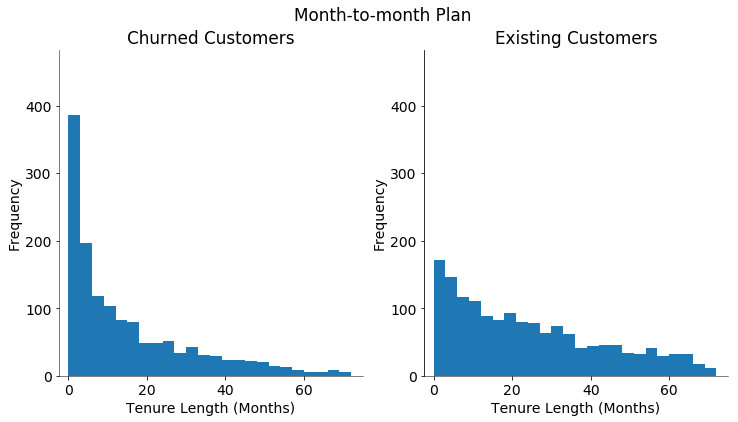

In [38]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [12, 6]})

# Histogram for Month-to-month PICs
bin_size = 3 # A size of a bin 
bins = np.arange(0, df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "Yes")]["tenure"].max()+bin_size, bin_size) # Array of bins

# Get the maxima values to be used for graphs
largest = df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No")]["tenure"].max() # Max value of the tenure column
bin_numbers = math.ceil(largest/bin_size) + 1 # Calculate the number of bins to be graphed. A bit hacky.

count_churned, division_churned = np.histogram(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes")]["tenure"], bin_numbers) # Get the histogram raw data for the churned customers
count_stayed, division_stayed = np.histogram(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No")]["tenure"], bin_numbers) # Get the histogram raw data for the current customers

max_count_churned = count_churned.max()
max_count_stayed = count_stayed.max()
max_division_churned = division_churned.max()
max_division_stayed = division_stayed.max()

max_count_val = max_count_churned if max_count_churned >= max_count_stayed else max_count_stayed
max_division_val = max_division_churned if max_division_churned >= max_division_stayed else max_division_stayed

max_count_val = round(max_count_val, -1) *  1.05 # Multiply by 1.1 to give the graph a slightly more head room
max_division_val = round(max_division_val) + bin_size

# Create graphs
plt.figure()

plt.suptitle("Month-to-month Plan")
plt.subplot(1, 2, 1)
plt.hist(data=df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes") & (df["Contract"] == "Month-to-month")], x="tenure", bins=bins)
plt.title("Churned Customers")
plt.xlabel("Tenure Length (Months)")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, max_count_val)
cur_axes = plt.gca()
cur_axes.spines['top'].set_visible(False)
cur_axes.spines['right'].set_visible(False)
cur_axes.spines['bottom'].set_linewidth(0.5)
cur_axes.spines['left'].set_linewidth(0.5)

plt.subplot(1, 2, 2)
plt.hist(data=df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No") & (df["Contract"] == "Month-to-month")], x="tenure", bins=bins)
plt.title("Existing Customers")
plt.xlabel("Tenure Length (Months)")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, max_count_val)

cur_axes = plt.gca()
cur_axes.spines['top'].set_visible(False)
cur_axes.spines['right'].set_visible(False)
cur_axes.spines['bottom'].set_linewidth(0.5)

plt.savefig("3_2_TenureHistogram_Month_to_month.png")
plt.show()



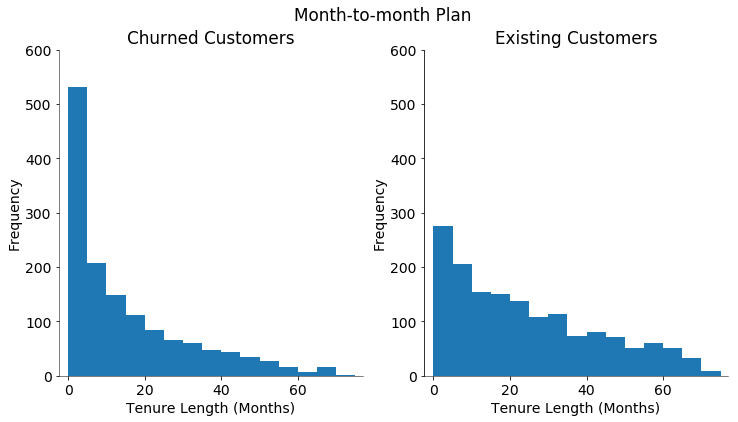

In [13]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [12, 6]})

# Histogram for Month-to-month PICs
bin_size = 5 # A size of a bin 
bins = np.arange(0, df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "Yes")]["tenure"].max()+bin_size, bin_size) # Array of bins

# Get the maxima values to be used for graphs
largest = df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No")]["tenure"].max() # Max value of the tenure column
bin_numbers = (math.ceil(largest/(bin_size * 10)) * 10) # Calculate the number of bins to be graphed. A bit hacky.
count_churned, division_churned = np.histogram(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes")]["tenure"], bin_numbers) # Get the histogram raw data for the churned customers
count_stayed, division_stayed = np.histogram(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No")]["tenure"], bin_numbers) # Get the histogram raw data for the current customers

max_count_churned = count_churned.max()
max_count_stayed = count_stayed.max()
max_division_churned = division_churned.max()
max_division_stayed = division_stayed.max()

max_count_val = max_count_churned if max_count_churned >= max_count_stayed else max_count_stayed
max_division_val = max_division_churned if max_division_churned >= max_division_stayed else max_division_stayed

ylim_churned = max_count_churned * 1.1 # Multiply by 1.1 to give the graph a slightly more head room
ylim_stayed = max_count_stayed * 1.1 # Multiply by 1.1 to give the graph a slightly more head room

max_count_val = round(max_count_val, -1) *  1.1 # Multiply by 1.1 to give the graph a slightly more head room
max_division_val = round(max_division_val) + bin_size

# Create graphs
plt.figure()

plt.suptitle("Month-to-month Plan")
plt.subplot(1, 2, 1)
plt.hist(data=df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes") & (df["Contract"] == "Month-to-month")], x="tenure", bins=bins)
plt.title("Churned Customers")
plt.xlabel("Tenure Length (Months)")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, 600)
cur_axes = plt.gca()
cur_axes.spines['top'].set_visible(False)
cur_axes.spines['right'].set_visible(False)
cur_axes.spines['bottom'].set_linewidth(0.5)
cur_axes.spines['left'].set_linewidth(0.5)

plt.subplot(1, 2, 2)
plt.hist(data=df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No") & (df["Contract"] == "Month-to-month")], x="tenure", bins=bins)
plt.title("Existing Customers")
plt.xlabel("Tenure Length (Months)")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, 600)

cur_axes = plt.gca()
cur_axes.spines['top'].set_visible(False)
cur_axes.spines['right'].set_visible(False)
cur_axes.spines['bottom'].set_linewidth(0.5)

plt.savefig("3_2_TenureHistogram_Month_to_month.png")
plt.show()



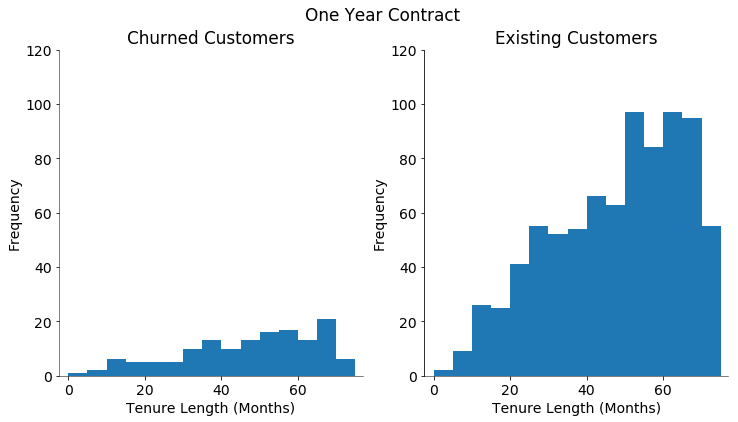

In [31]:
# Tenure histogram for PICs with one year contract

# Create graphs
plt.rcParams.update({'figure.figsize': [12, 6]})
plt.figure()

plt.suptitle("One Year Contract")
plt.subplot(1, 2, 1)
plt.hist(data=df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes") & (df["Contract"] == "One year")], x="tenure", bins=bins)
plt.title("Churned Customers")
plt.xlabel("Tenure Length (Months)")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, 120)
cur_axes = plt.gca()
cur_axes.spines['top'].set_visible(False)
cur_axes.spines['right'].set_visible(False)
cur_axes.spines['bottom'].set_linewidth(0.5)
cur_axes.spines['left'].set_linewidth(0.5)

plt.subplot(1, 2, 2)
plt.hist(data=df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No") & (df["Contract"] == "One year")], x="tenure", bins=bins)
plt.title("Existing Customers")
plt.xlabel("Tenure Length (Months)")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, 120);

cur_axes = plt.gca()
cur_axes.spines['top'].set_visible(False)
cur_axes.spines['right'].set_visible(False)
cur_axes.spines['bottom'].set_linewidth(0.5)

plt.savefig("3_3_TenureHistogram_One_Year_Contract.png")


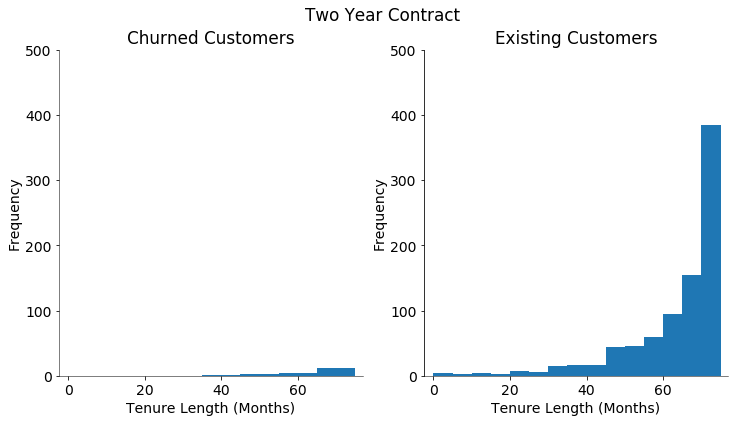

In [32]:
# Tenure histogram for PICs with two year contract

# Create graphs
plt.rcParams.update({'figure.figsize': [12, 6]})
plt.figure()

plt.suptitle("Two Year Contract")
plt.subplot(1, 2, 1)
plt.hist(data=df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes") & (df["Contract"] == "Two year")], x="tenure", bins=bins)
plt.title("Churned Customers")
plt.xlabel("Tenure Length (Months)")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, 500)

cur_axes = plt.gca()
cur_axes.spines['top'].set_visible(False)
cur_axes.spines['right'].set_visible(False)
cur_axes.spines['bottom'].set_linewidth(0.5)
cur_axes.spines['left'].set_linewidth(0.5)

plt.subplot(1, 2, 2)
plt.hist(data=df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No") & (df["Contract"] == "Two year")], x="tenure", bins=bins)
plt.title("Existing Customers")
plt.xlabel("Tenure Length (Months)")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, 500)

cur_axes = plt.gca()
cur_axes.spines['top'].set_visible(False)
cur_axes.spines['right'].set_visible(False)
cur_axes.spines['bottom'].set_linewidth(0.5)

plt.savefig("3_4_TenureHistogram_Two_Year_Contract.png")

In [41]:
total_churn = df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes")].shape[0]
short_term_churn = df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes") & (df["tenure"] < 12)].shape[0]
print("Short-term customer churn accounts for {0:.1f}% within the PICs segment.".format((short_term_churn/total_churn*100.0)))

Short-term customer churn accounts for 50.9% within the PICs segment.


The histogram shows that majority of the churn takes place within a first year of the service. This behavior might be partially driven by the types of contract. Let's take a look.

In [11]:
df[(df["TechSupport"] == "Yes")]["customerID"].count()

2044

In [15]:
df[(df["TechSupport"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()

310

In [16]:
df[(df["TechSupport"] == "No")]["customerID"].count()

3473

In [17]:
df[(df["TechSupport"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()

1446

In [42]:
short_term_churn_counts = df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes") & (df["tenure"] < 12)]["Contract"].value_counts()

In [43]:
short_term_churned_values = []
for i in range(len(short_term_churn_counts.index)):
    short_term_churned_values.append(short_term_churn_counts[i])
short_term_churned_labels = list(short_term_churn_counts.index)

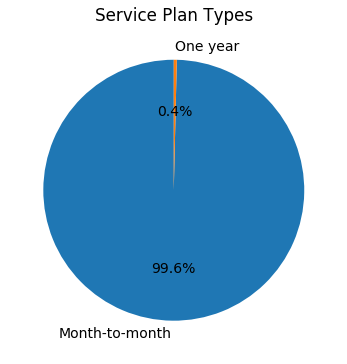

In [49]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [10, 6]})
fig = plt.figure()

ax = fig.add_subplot(111)
ax.pie(short_term_churned_values, labels=short_term_churned_labels, startangle=90, autopct='%1.1f%%')
ax.set_title("Service Plan Types")
plt.savefig("4_ServicePlan.png")
plt.show()

This is quite striking (although not surprising). Almost all PICs who churned within a year were on a month-to-month plan.

In [10]:
# M2M plan customers
plan_churn_percent = []
plan_churn_labels = []
Churned_count = df[(df["Contract"] == "Month-to-month") & (df["Churn"] == "Yes")]["Churn"].count()
Total_count = df[(df["Contract"] == "Month-to-month")]["Churn"].count()
plan_churn_percent.append((Churned_count / Total_count) * 100.0)
plan_churn_labels.append("Month-to-Month") 

# one year contract customers
Churned_count = df[(df["Contract"] == "One year") & (df["Churn"] == "Yes")]["Churn"].count()
Total_count = df[(df["Contract"] == "One year")]["Churn"].count()
plan_churn_percent.append((Churned_count / Total_count) * 100.0)
plan_churn_labels.append("One-Year Contract")

# Two year contract customers
Churned_count = df[(df["Contract"] == "Two year") & (df["Churn"] == "Yes")]["Churn"].count()
Total_count = df[(df["Contract"] == "Two year")]["Churn"].count()
plan_churn_percent.append((Churned_count / Total_count) * 100.0)
plan_churn_labels.append("Two-Year Contract")


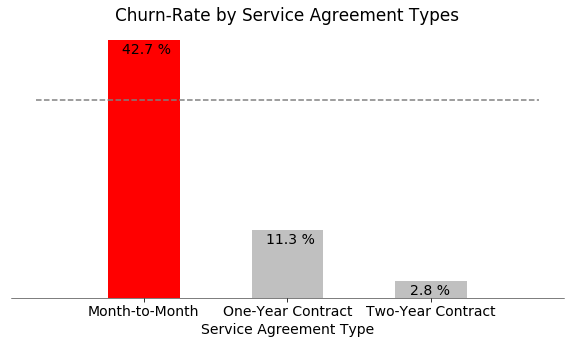

In [11]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [8.5, 5]})
fig = plt.figure()
ax = fig.add_subplot(111)
idx = [0.75, 1.75, 2.75]
bar_width = 0.5
ax.bar(idx, plan_churn_percent, align="center", width=bar_width, color=["red", "silver", "silver"])
for i, v in enumerate(plan_churn_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.3, value)
ax.set_xticks(idx)
ax.set_xticklabels(plan_churn_labels)
ax.set_xlabel("Service Agreement Type")
ax.set_title("Churn-Rate by Service Agreement Types")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 3.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("2_ChurnRateByPlan.png")
plt.show()

In [66]:
df[(df["Contract"] == "Month-to-month") & (df["Churn"] == "Yes") & (df["tenure"] <= 6)]["customerID"].count()

780

In [28]:
df[(df["Contract"] == "Month-to-month") & (df["Churn"] == "Yes")]["customerID"].count()

1655

In [23]:
df[(df["Contract"] == "Month-to-month") & (df["Churn"] == "No")]["customerID"].count()

2220

In [48]:
df[(df["Contract"] == "Month-to-month")]["customerID"].count()

3875

Almost half of the churned M2M customers quit within the first 6 months of the service!

#### Monthly Charges
Another feature that might influence the churn is the monthly charges. This might be especially true for price-sensitive customers. Let's compare the monthly charges between the churned  and the current customers.

In [34]:
monthly_charges_churned = []
monthly_charges_current = []
years = [1, 2, 3, 4, 5, 6]
for i in years:
    start_month = (i - 1) * 12
    end_month = i * 12
    monthly_charges_churned.append(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "Yes") & (df["tenure"] >= start_month) & (df["tenure"] < end_month)]["MonthlyCharges"].median())
    monthly_charges_current.append(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes") & (df["Churn"] == "No") & (df["tenure"] >= start_month) & (df["tenure"] < end_month)]["MonthlyCharges"].median())


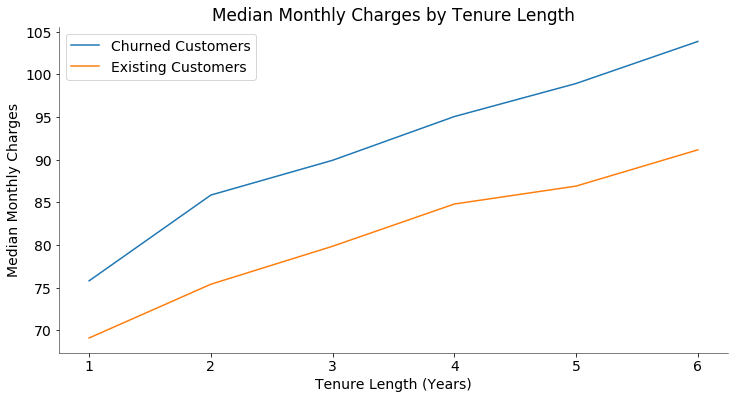

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(years, monthly_charges_churned, label="Churned Customers")
ax.plot(years, monthly_charges_current, label="Existing Customers")
ax.set_title("Median Monthly Charges by Tenure Length")
ax.set_xlabel("Tenure Length (Years)")
ax.set_ylabel("Median Monthly Charges")
ax.legend(loc="upper left")

cur_axes = plt.gca()
cur_axes.spines['top'].set_visible(False)
cur_axes.spines['right'].set_visible(False)
cur_axes.spines['bottom'].set_linewidth(0.5)
cur_axes.spines['left'].set_linewidth(0.5)

plt.savefig("5_MonthlyChargesChurn.png")
plt.show()

#### Demographic Data Comparison

Let's first compare the demographic data between the churned and the current customers.

In [53]:
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize': [12, 8]})

In [7]:
demographic_column_names = ["gender", "SeniorCitizen", "Partner", "Dependents"]

In [18]:
df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No")]["customerID"].count()

4835

In [43]:
df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "Yes")]["Dependents"].value_counts()

No     1311
Yes     275
Name: Dependents, dtype: int64

In [46]:
df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Dependents"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()

275

In [47]:
df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Dependents"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()

986

In [48]:
df[(df["Contract"] == "Month-to-month")]["customerID"].count()

3875

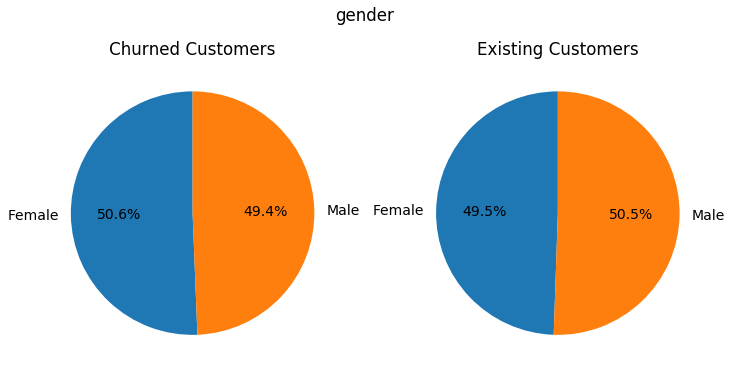

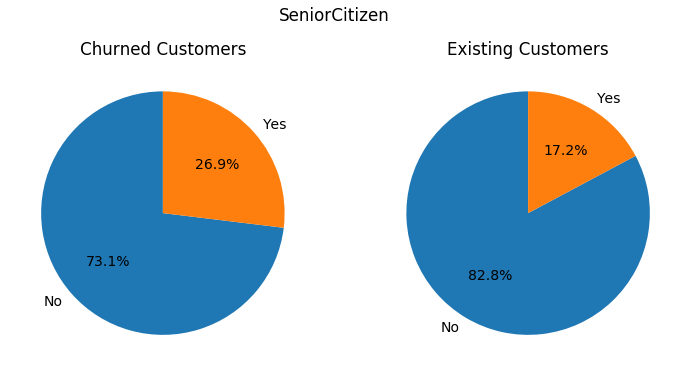

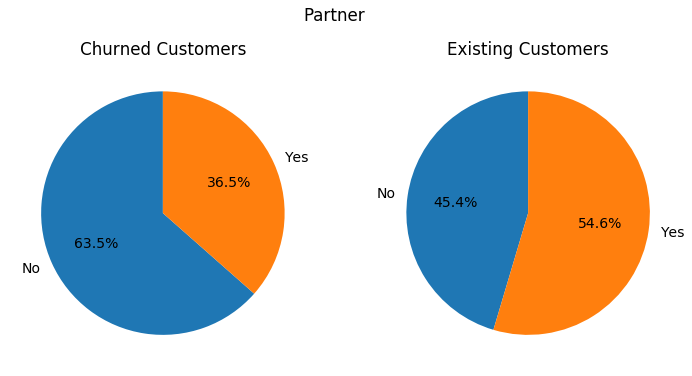

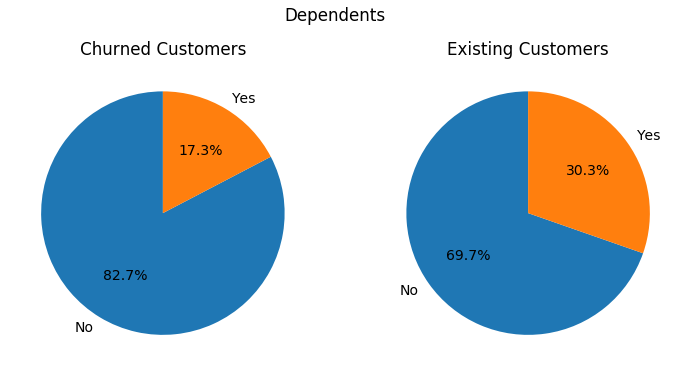

In [56]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [12, 6]})
for col_name in demographic_column_names:
    churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "Yes")][col_name].value_counts()
    stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "No")][col_name].value_counts()

    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
    ax2.set_title("Existing Customers")
    
    plt.suptitle(col_name)
    file_name = col_name + ".png"
    plt.savefig(file_name)
    plt.show()
    
    print('\n')


In [45]:
df[df["Churn"] == "Yes"]["customerID"].count()

1869

In [46]:
df[df["Churn"] == "No"]["customerID"].count()

5174

In [49]:
df[df["Churn"] == "Yes"]["customerID"].count()/df.shape[0]*100

26.536987079369588

In [8]:
gender_column_names = ["Male", "Female"]

In [9]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [8, 4]})
churned_percent = []
for col_name in gender_column_names:
    if col_name == "Male":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["gender"] == "Male") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["gender"] == "Male") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "Female":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["gender"] == "Female") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["gender"] == "Female") & (df["Churn"] == "No")]["customerID"].count()
    
    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

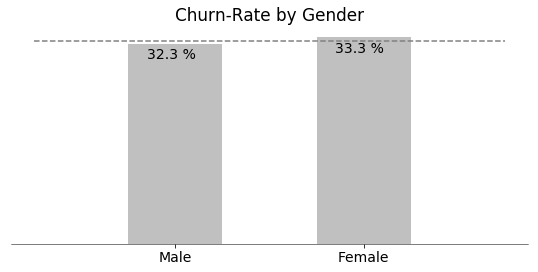

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver")
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(gender_column_names)
ax.set_title("Churn-Rate by Gender")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("Gender.png")
plt.show()



In [11]:
senior_status_column_names = ["Senior Citizen", "Non-Senior Citizen"]

In [12]:
churned_percent = []
for col_name in senior_status_column_names:
    if col_name == "Senior Citizen":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["SeniorCitizen"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["SeniorCitizen"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "Non-Senior Citizen":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["SeniorCitizen"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["SeniorCitizen"] == "No") & (df["Churn"] == "No")]["customerID"].count()
    
    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

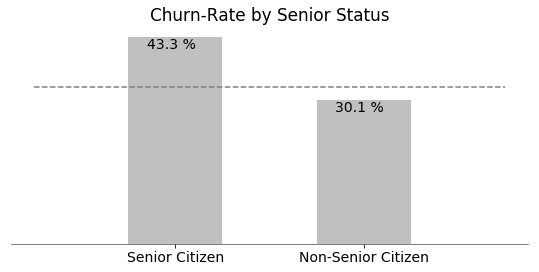

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(senior_status_column_names)
ax.set_title("Churn-Rate by Senior Status")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("SeniorCitizen.png")
plt.show()



In [14]:
partner_column_names = ["Partner", "No Partner"]

In [15]:
churned_percent = []
for col_name in partner_column_names:
    if col_name == "Partner":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Partner"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Partner"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "No Partner":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Partner"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Partner"] == "No") & (df["Churn"] == "No")]["customerID"].count()
    
    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

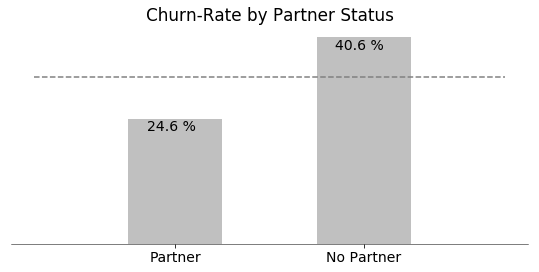

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(partner_column_names)
ax.set_title("Churn-Rate by Partner Status")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("Partner.png")
plt.show()



In [18]:
dependents_column_names = ["Dependents", "No Dependents"]

In [19]:
churned_percent = []
for col_name in dependents_column_names:
    if col_name == "Dependents":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Dependents"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Dependents"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "No Dependents":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Dependents"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Dependents"] == "No") & (df["Churn"] == "No")]["customerID"].count()

    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

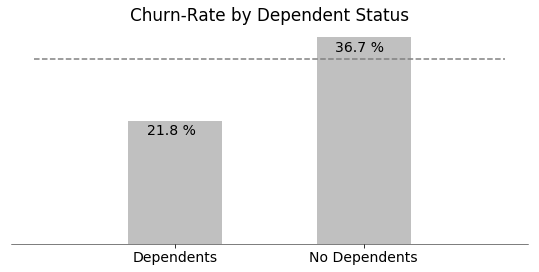

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(dependents_column_names)
ax.set_title("Churn-Rate by Dependent Status")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("Dependents.png")
plt.show()



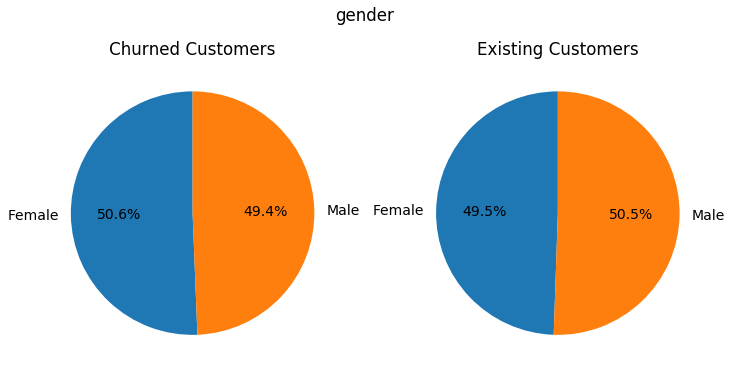

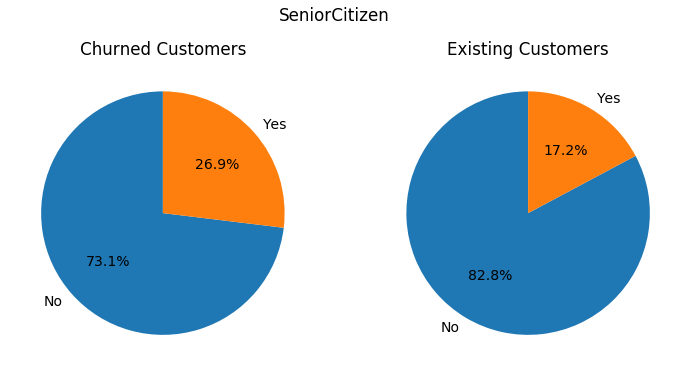

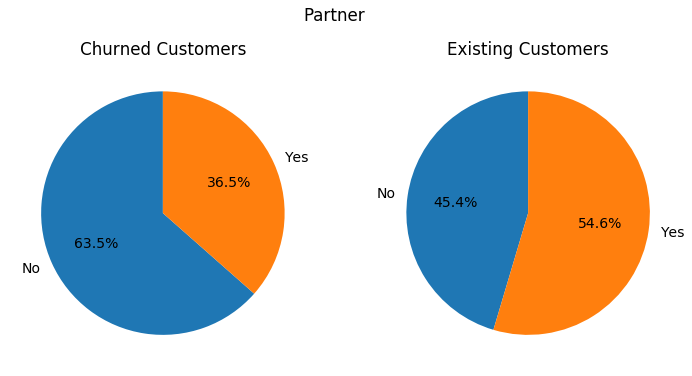

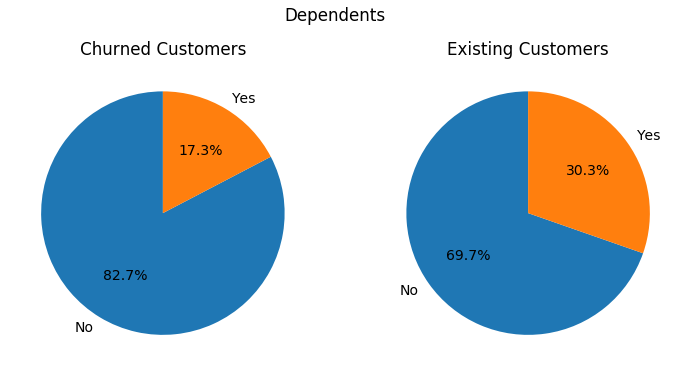

In [56]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [12, 6]})
for col_name in demographic_column_names:
    churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "Yes")][col_name].value_counts()
    stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "No")][col_name].value_counts()

    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
    ax2.set_title("Existing Customers")
    
    plt.suptitle(col_name)
    file_name = col_name + ".png"
    plt.savefig(file_name)
    plt.show()
    
    print('\n')


Customers with partner or dependents are more likely to stay with the company. This makes sense, because, having one business simplifies billing and tech support for a family, rather than having to pay multiple bills, or deal with different companies for each members' phone problems in a family.

There doesn't seem to be a significant difference by gender or the senior status. 

#### Account Information Comparison

Let's now take a look at the account information. 

In [112]:
account_info_column_names = ["Contract", "PaperlessBilling"]

In [113]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [14, 6]})

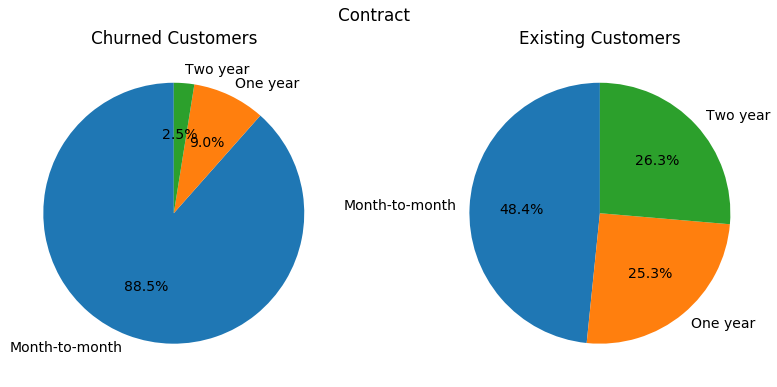

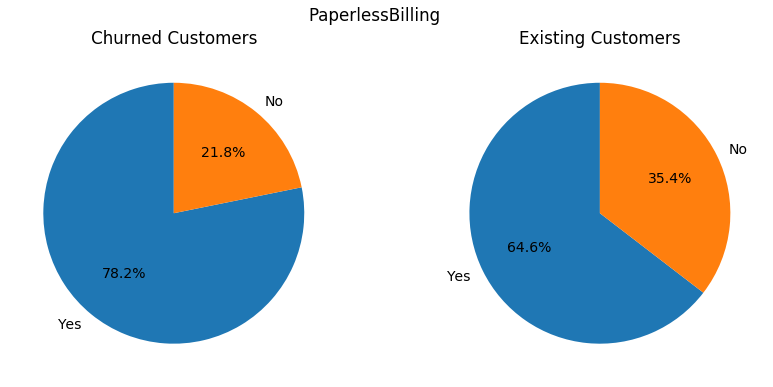

In [114]:
for col_name in account_info_column_names:
    churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "Yes")][col_name].value_counts()
    stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "No")][col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90)
    ax2.set_title("Existing Customers")
    
    plt.suptitle(col_name)
    file_name = col_name + ".png"
    plt.savefig(file_name)
    plt.show()
    
    print('\n')


In [21]:
paperless_billing_column_names = ["Paperless", "Paper"]

In [22]:
churned_percent = []
for col_name in paperless_billing_column_names:
    if col_name == "Paperless":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaperlessBilling"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaperlessBilling"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "Paper":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaperlessBilling"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaperlessBilling"] == "No") & (df["Churn"] == "No")]["customerID"].count()

    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

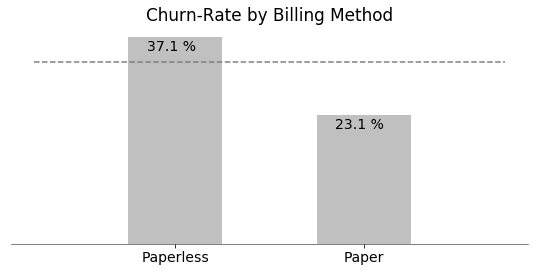

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(paperless_billing_column_names)
ax.set_title("Churn-Rate by Billing Method")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("PaperlessBilling.png")
plt.show()



In [115]:
account_info_column_names_2 = ["PaymentMethod"]

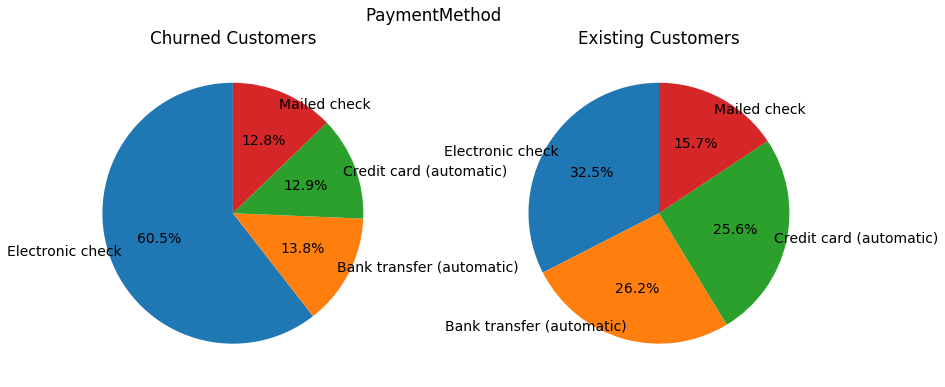

In [117]:
for col_name in account_info_column_names_2:
    churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "Yes")][col_name].value_counts()
    stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "No")][col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90, labeldistance=0.9)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90, labeldistance=0.9)
    ax2.set_title("Existing Customers")
    
    plt.suptitle(col_name)
    file_name = col_name + ".png"
    plt.savefig(file_name)
    plt.show()
    
    print('\n')


In [24]:
payment_method_column_names = ["Mailed Check", "Credit Card", "Bank Transfer", "Elec. Check"]

In [25]:
churned_percent = []
for col_name in payment_method_column_names:
    if col_name == "Mailed Check":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaymentMethod"] == "Mailed check") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaymentMethod"] == "Mailed check") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "Credit Card":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaymentMethod"] == "Credit card (automatic)") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaymentMethod"] == "Credit card (automatic)") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "Bank Transfer":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaymentMethod"] == "Bank transfer (automatic)") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaymentMethod"] == "Bank transfer (automatic)") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "Elec. Check":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaymentMethod"] == "Electronic check") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["PaymentMethod"] == "Electronic check") & (df["Churn"] == "No")]["customerID"].count()

    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

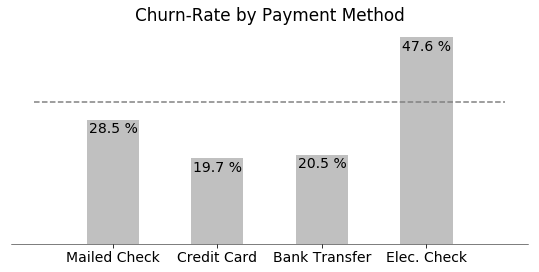

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75, 2.75, 3.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.52 , v - 3, value)
ax.set_xticks(idx)
ax.set_xticklabels(payment_method_column_names)
ax.set_title("Churn-Rate by Payment Method")


plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 4.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("PaymentMethod.png")
plt.show()



The type of contract shows a significant difference between the churned and the current customers. This finding makes sense as the contract-based customers are bound to the service for a specified length of time, while the month-to-month customers have a freedom to leave. 

The paperless billing and the payment method also influences the churn-rate, but it's unclear why without further analysis.

#### The Internet Services
Now let's take a look at the Internet service. For the comparison of the Internet services, customers without the Internet services will be excluded.

In [213]:
internet_column_names = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

In [25]:
df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["OnlineSecurity"] == "Yes")]["Churn"].value_counts()

No     1470
Yes     266
Name: Churn, dtype: int64

In [26]:
df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["DeviceProtection"] == "Yes")]["Churn"].value_counts()

No     1621
Yes     496
Name: Churn, dtype: int64

In [27]:
df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["TechSupport"] == "Yes")]["Churn"].value_counts()

No     1473
Yes     282
Name: Churn, dtype: int64

In [28]:
df[(df["Contract"] == "Month-to-month") & (df["Churn"] == "Yes")]["customerID"].count()

1655

In [23]:
df[(df["Contract"] == "Month-to-month") & (df["Churn"] == "No")]["customerID"].count()

2220

In [48]:
df[(df["Contract"] == "Month-to-month")]["customerID"].count()

3875

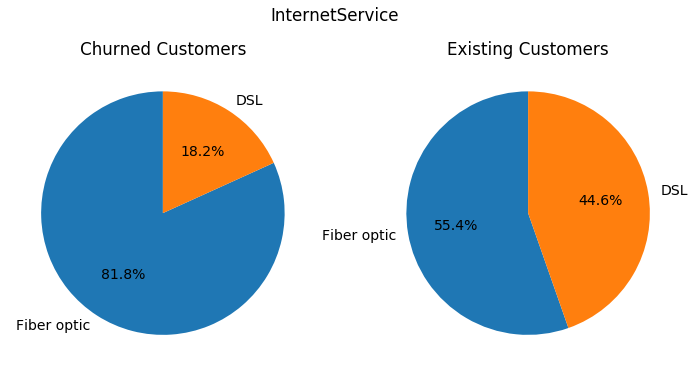

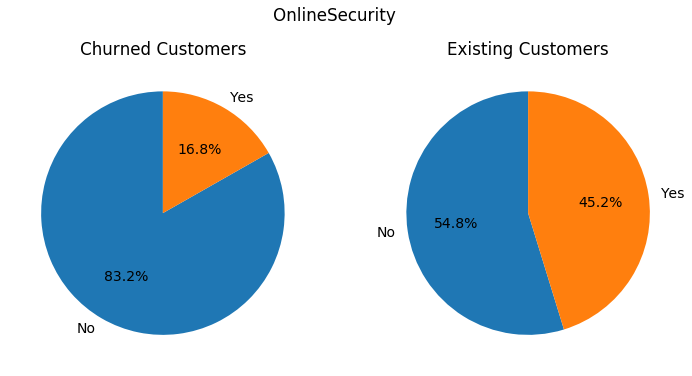

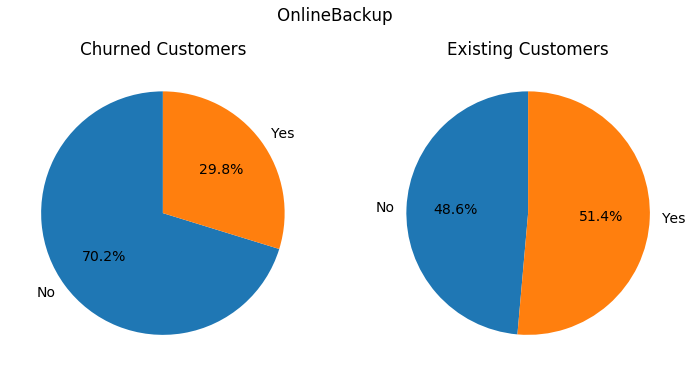

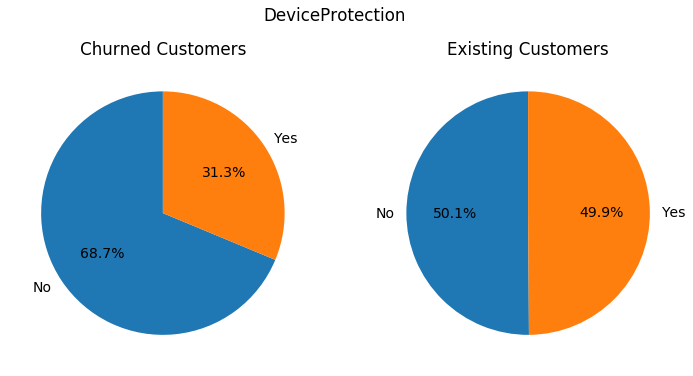

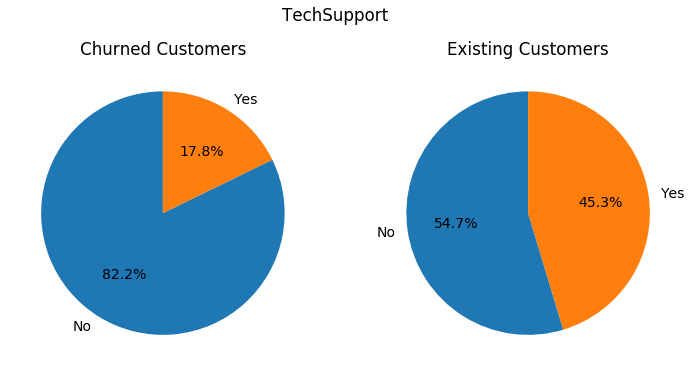

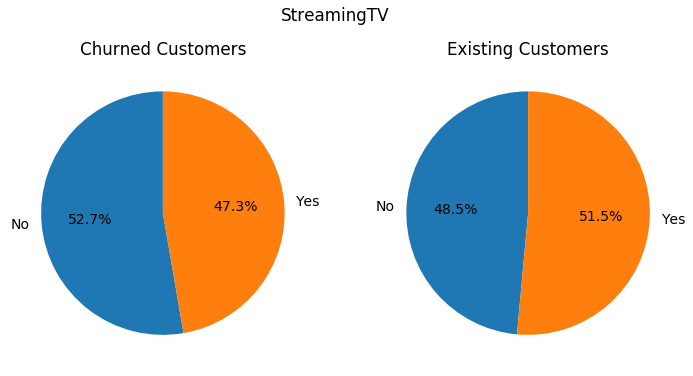

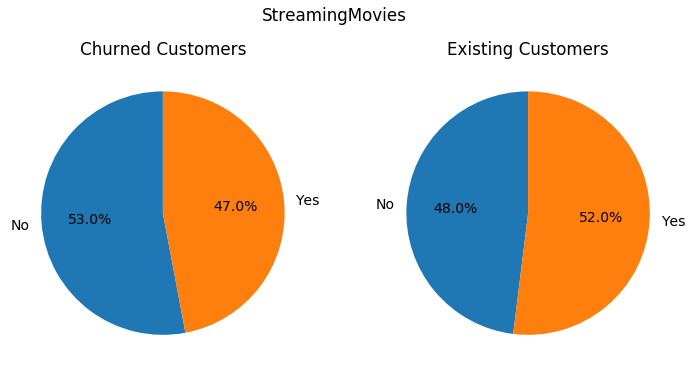

In [61]:
for col_name in internet_column_names:
    churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "Yes")][col_name].value_counts()
    stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["Churn"] == "No")][col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
    ax2.set_title("Existing Customers")
    
    plt.suptitle(col_name)
    file_name = col_name + ".png"
    plt.savefig(file_name)
    plt.show()
    
    print('\n')


In [27]:
infrastructure_column_names = ["DSL", "Fiber Optic"]

In [28]:
churned_percent = []
for col_name in infrastructure_column_names:
    if col_name == "DSL":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["InternetService"] == "DSL") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["InternetService"] == "DSL") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "Fiber Optic":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["InternetService"] == "Fiber optic") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["InternetService"] == "Fiber optic") & (df["Churn"] == "No")]["customerID"].count()

    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

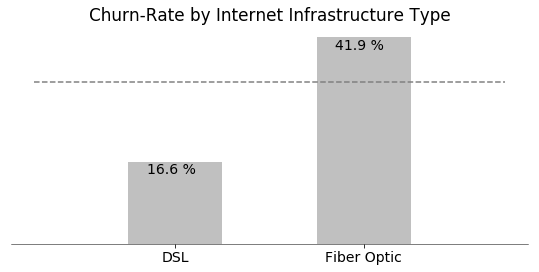

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(infrastructure_column_names)
ax.set_title("Churn-Rate by Internet Infrastructure Type")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("InternetInfrastructure.png")
plt.show()



In [30]:
online_security_column_names = ["Online Security", "No Online Security"]

In [31]:
churned_percent = []
for col_name in online_security_column_names:
    if col_name == "Online Security":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["OnlineSecurity"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["OnlineSecurity"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "No Online Security":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["OnlineSecurity"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["OnlineSecurity"] == "No") & (df["Churn"] == "No")]["customerID"].count()

    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

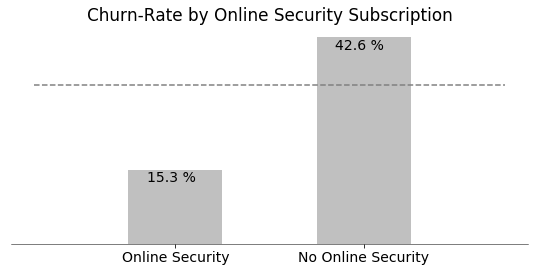

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(online_security_column_names)
ax.set_title("Churn-Rate by Online Security Subscription")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("OnlineSecurity.png")
plt.show()



In [33]:
online_backup_column_names = ["Online Backup", "No Online Backup"]

In [34]:
churned_percent = []
for col_name in online_backup_column_names:
    if col_name == "Online Backup":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["OnlineBackup"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["OnlineBackup"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "No Online Backup":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["OnlineBackup"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["OnlineBackup"] == "No") & (df["Churn"] == "No")]["customerID"].count()

    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

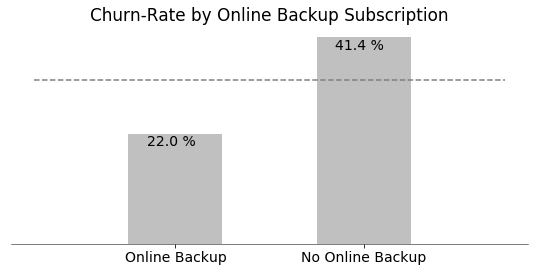

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(online_backup_column_names)
ax.set_title("Churn-Rate by Online Backup Subscription")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("OnlineBackup.png")
plt.show()



In [36]:
device_protection_column_names = ["Device Protection", "No Device Protection"]

In [37]:
churned_percent = []
for col_name in device_protection_column_names:
    if col_name == "Device Protection":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["DeviceProtection"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["DeviceProtection"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "No Device Protection":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["DeviceProtection"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["DeviceProtection"] == "No") & (df["Churn"] == "No")]["customerID"].count()

    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

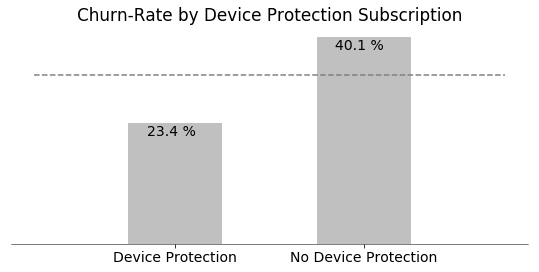

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(device_protection_column_names)
ax.set_title("Churn-Rate by Device Protection Subscription")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("DeviceProtection.png")
plt.show()



In [39]:
tech_support_column_names = ["Tech Support", "No Tech Support"]

In [40]:
churned_percent = []
for col_name in tech_support_column_names:
    if col_name == "Tech Support":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["TechSupport"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["TechSupport"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "No Tech Support":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["TechSupport"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["TechSupport"] == "No") & (df["Churn"] == "No")]["customerID"].count()

    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

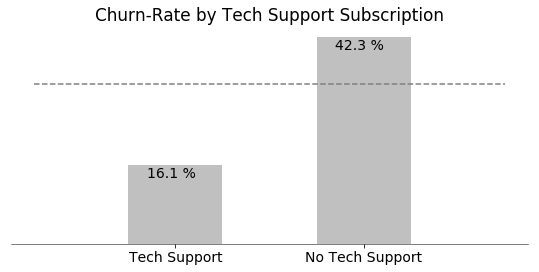

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(tech_support_column_names)
ax.set_title("Churn-Rate by Tech Support Subscription")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("TechSupport.png")
plt.show()



In [42]:
streamingTV_column_names = ["Streaming TV", "No Streaming TV"]

In [43]:
churned_percent = []
for col_name in streamingTV_column_names:
    if col_name == "Streaming TV":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["StreamingTV"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["StreamingTV"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "No Streaming TV":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["StreamingTV"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["StreamingTV"] == "No") & (df["Churn"] == "No")]["customerID"].count()

    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

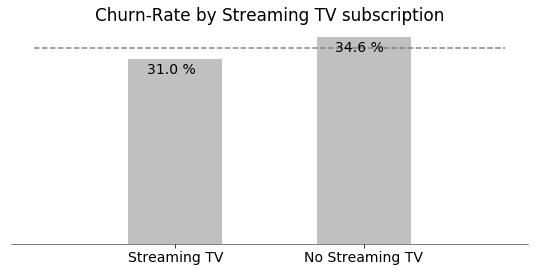

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(streamingTV_column_names)
ax.set_title("Churn-Rate by Streaming TV subscription")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("StreamingTV.png")
plt.show()



In [45]:
streamingMovies_column_names = ["Streaming Movies", "No Streaming Movies"]

In [46]:
churned_percent = []
for col_name in streamingMovies_column_names:
    if col_name == "Streaming Movies":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["StreamingMovies"] == "Yes") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["StreamingMovies"] == "Yes") & (df["Churn"] == "No")]["customerID"].count()
    elif col_name == "No Streaming Movies":
        churned_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["StreamingMovies"] == "No") & (df["Churn"] == "Yes")]["customerID"].count()
        stayed_count = df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No") & (df["StreamingMovies"] == "No") & (df["Churn"] == "No")]["customerID"].count()

    churned_percent.append((churned_count / (churned_count + stayed_count) * 100.0))
    

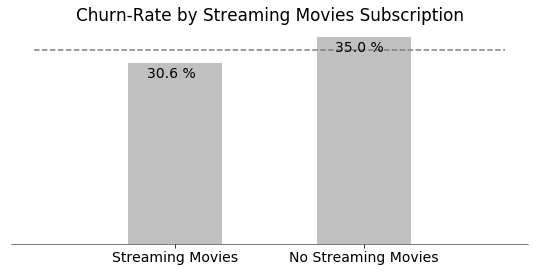

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111) 
idx = [0.75, 1.75]
bar_width = 0.5
ax.bar(idx, churned_percent, bar_width, color="silver") 
for i, v in enumerate(churned_percent):
    value = str('{0:.1f}'.format(v)) + " %"
    ax.text(i + 0.6 , v - 2.5, value)
ax.set_xticks(idx)
ax.set_xticklabels(streamingMovies_column_names)
ax.set_title("Churn-Rate by Streaming Movies Subscription")

plt.tight_layout()
threshold = 32.8
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_visible(False)
ax.plot([0., 2.5], [threshold, threshold], "k--", color="gray")
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.savefig("StreamingMovies.png")
plt.show()



Tech support, Online Security, Internet type, seem to have a significant influence on the churn-rate, as well as  Online Backup and the Device Protection, to a lesser degree. Streaming TV and movies don't seem to influence heavily.

Having a tech support aliviates frustration when customers experience problems, so it makes sense that having tech support helps customers to stay with the company. 

The difference between DSL vs fiber optics is interesting. DSL is affordable, but slower than fiber optics, while fiber optics is fast, but much more costly. I would guess that customers who chose fiber optics are quality-oriented customers (i.e. customers with sufficent discretionary income, who are interested in what they receive), and customers opting for DSL are price-sensitive, who do not need fast Internet connection.

Is it possible that some price-sensitive customers find the fiber optics Internet unaffordable, resulting in their departure from the company?

On the other hand, it looks like services such as online security and online backup are provide significant value to customers, and those customers who subscribed for these services are more likely to stay with the company.

The streaming TV and movies services have much less significance compared to other features. This could be because  customers can receive similar services from a third party providers (YouTube, Netflix, iTunes, etc.) so the added value of having these services is not noticible.

One thing to note here. All fiber optic customers also have phone service, as seen below. It looks like customers have to subscribe to the phone service to get fiber optic Internet. I wonder if there are customers who want fiber optic Internet by itself without the phone line. Would decoupling the phone and fiber optic help these customers?

In [99]:
df["PaymentMethod"].head(20)

0              Electronic check
1                  Mailed check
2                  Mailed check
3     Bank transfer (automatic)
4              Electronic check
5              Electronic check
6       Credit card (automatic)
7                  Mailed check
8              Electronic check
9     Bank transfer (automatic)
10                 Mailed check
11      Credit card (automatic)
12      Credit card (automatic)
13    Bank transfer (automatic)
14             Electronic check
15      Credit card (automatic)
16                 Mailed check
17    Bank transfer (automatic)
18      Credit card (automatic)
19             Electronic check
Name: PaymentMethod, dtype: object

In [90]:
df[(df["OnlineSecurity"] == "No") & (df["OnlineBackup"] == "No") & (df["TechSupport"] == "No") & (df["InternetService"] == "Fiber optic") & (df["PaymentMethod"] == "Electronic check") & (df["Contract"] == "Month-to-month")]["Churn"].value_counts()

Yes    480
No     224
Name: Churn, dtype: int64

In [100]:
df[(df["OnlineSecurity"] == "Yes") & (df["OnlineBackup"] == "Yes") & (df["TechSupport"] == "Yes") & (df["InternetService"] == "DSL") & (df["PaymentMethod"] == "Credit card (automatic)") & (df["Contract"] == "Two year")]["Churn"].value_counts()

No     109
Yes      3
Name: Churn, dtype: int64

In [ ]:
68.2%

In [91]:
df[(df["OnlineSecurity"] == "No") & (df["OnlineBackup"] == "No") & (df["TechSupport"] == "No") & (df["InternetService"] == "Fiber optic") & (df["PaymentMethod"] == "Electronic check")]["Churn"].value_counts()

Yes    491
No     248
Name: Churn, dtype: int64

In [ ]:
66.4%

In [92]:
df[(df["OnlineSecurity"] == "No") & (df["OnlineBackup"] == "No") & (df["TechSupport"] == "No") & (df["InternetService"] == "Fiber optic")]["Churn"].value_counts()

Yes    698
No     466
Name: Churn, dtype: int64

In [ ]:
60.0%

In [93]:
df[(df["OnlineSecurity"] == "No") & (df["OnlineBackup"] == "No") & (df["TechSupport"] == "No")]["Churn"].value_counts()

Yes    925
No     788
Name: Churn, dtype: int64

In [ ]:
54.0%

In [94]:
df[(df["OnlineSecurity"] == "No") & (df["OnlineBackup"] == "No")]["Churn"].value_counts()

No     1138
Yes    1057
Name: Churn, dtype: int64

In [ ]:
51.8%

In [95]:
df[(df["OnlineSecurity"] == "No")]["Churn"].value_counts()

No     2037
Yes    1461
Name: Churn, dtype: int64

In [ ]:
58.2%

In [62]:
df[(df["InternetService"] == "Fiber optic") ]["PhoneService"].value_counts()

Yes    3096
Name: PhoneService, dtype: int64

Interestingly, all customers who subscribe to Fiber optic also have phone services, too. I wonder if the phone service is required to get a fiber optic.

## Results and Discussion

### Customer Segmentation

- 87.3% of the revenue is from PICs

- the churn rate is the highest (32.8%) for PICs.

##### Recommendations

- Focus the effort to reduce the churn for PICs.


### Characteristics of PIC

- 53.1% of the PICs churn happens in the first 12 months.

- PICs:

    - without contract are significantly more likely to churn.

    - with fiber optics Internet services are more likely to churn.

    - without tech support are significantly more likely to churn.

    - without online security, online backup, and device protection are more likely to churn.

##### Recommendations

- Provide incentives for customers to be on a contract plan (e.g. discounts, 

- Consider NOT providing incentives for month-to-month plan. This might help to discourage churn-prone customers who constantly seek discounts. 

- Suggest service changes to reduce monthly charges (e.g. change from fiber optics to DSL), or add additional supportive services (tech support, online security/backup, device protection)


## Supplemental Analysis

Below this is a similar analysis as above, for the whole population. In general, above findings and conclusions are applicable to the customer population.

In [64]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [12, 6]})

#### Demographics

In [65]:
demographic_column_names = ["gender", "SeniorCitizen", "Partner", "Dependents"]

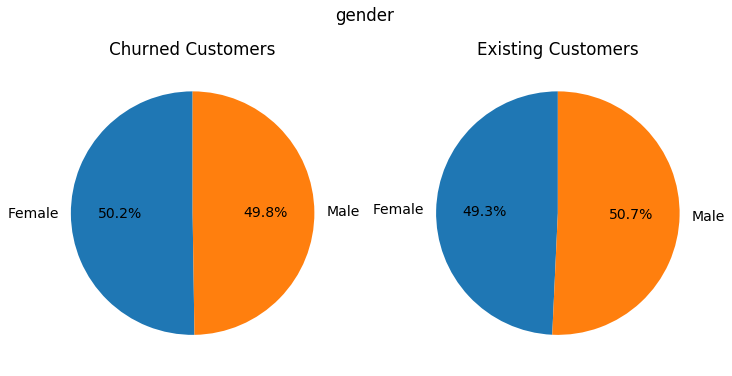

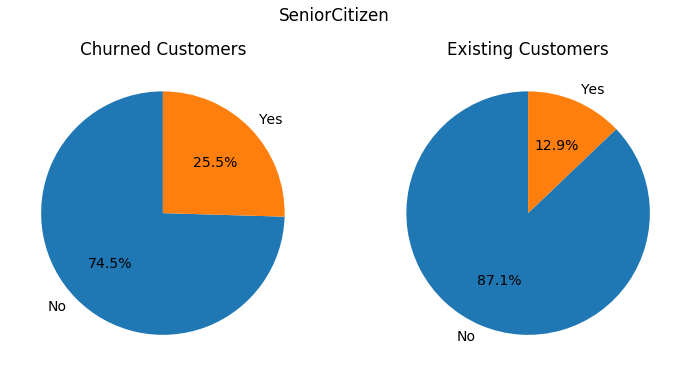

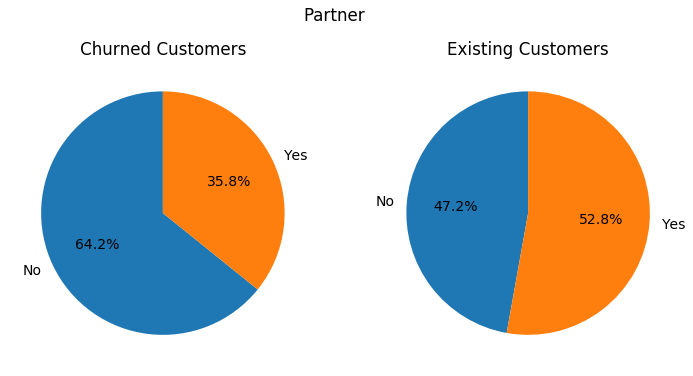

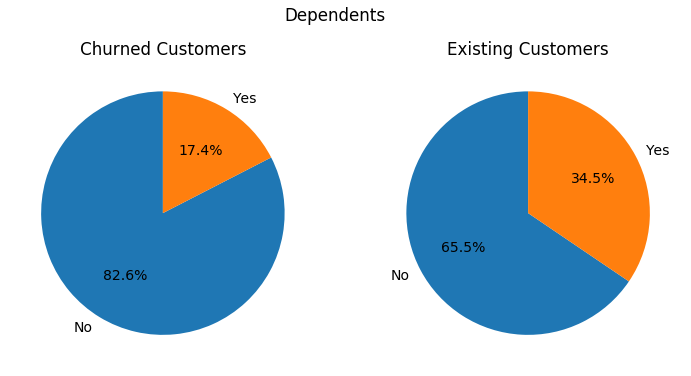

In [66]:
for col_name in demographic_column_names:
    churned_count = df[(df["Churn"] == "Yes")][col_name].value_counts()
    stayed_count = df[(df["Churn"] == "No")][col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
    ax2.set_title("Existing Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')


#### Account Information Comparison

In [67]:
account_info_column_names = ["Contract", "PaperlessBilling", "PaymentMethod"]

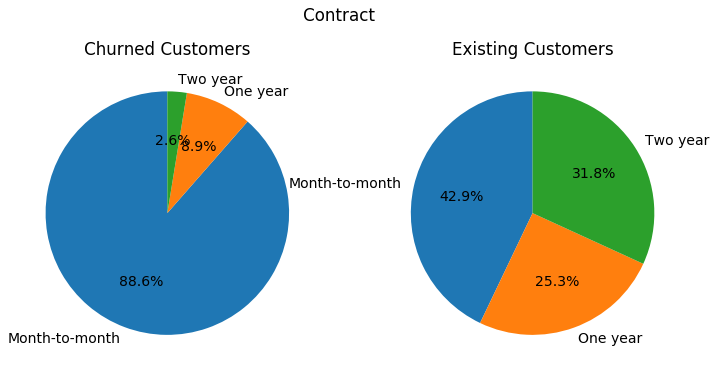

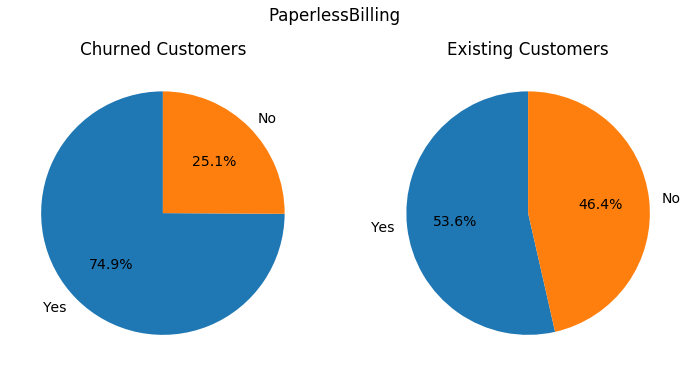

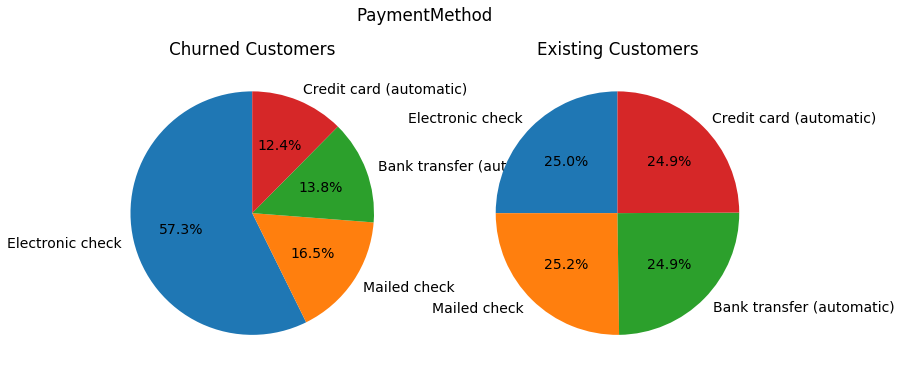

In [84]:
for col_name in account_info_column_names:
    churned_count = df[(df["Churn"] == "Yes")][col_name].value_counts()
    stayed_count = df[(df["Churn"] == "No")][col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
    ax2.set_title("Existing Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')


#### Services Comparison


In [70]:

service_labels = ["Phone Only", "Internet Only", "Phone and Internet"]
service_counts = []
service_counts.append(df[(df["InternetService"] == "No") & (df["PhoneService"] == "Yes")].shape[0]) # Phone only customers
service_counts.append(df[(df["InternetService"] != "No") & (df["PhoneService"] == "No")].shape[0]) # Internet only customers
service_counts.append(df[(df["InternetService"] != "No") & (df["PhoneService"] == "Yes")].shape[0]) # Phone and Internet customers

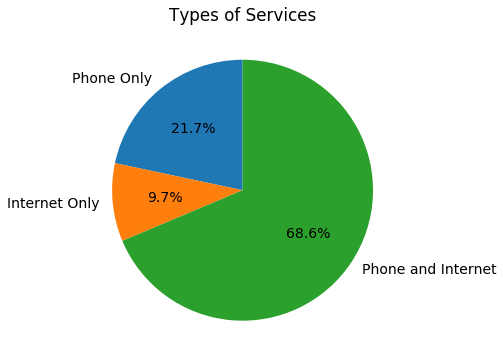

In [73]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [10, 6]})
fig = plt.figure()

ax = fig.add_subplot(111)
ax.pie(service_counts, labels=service_labels, startangle=90, autopct='%1.1f%%')
ax.set_title("Types of Services")
plt.show()

The majority of the customers have the phone and the Internet services. This supports the finding that PICs are the most valuable customers.

#### Phone Service Comparison

In [74]:
phone_column_names = ["PhoneService", "MultipleLines"]
internet_column_names = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

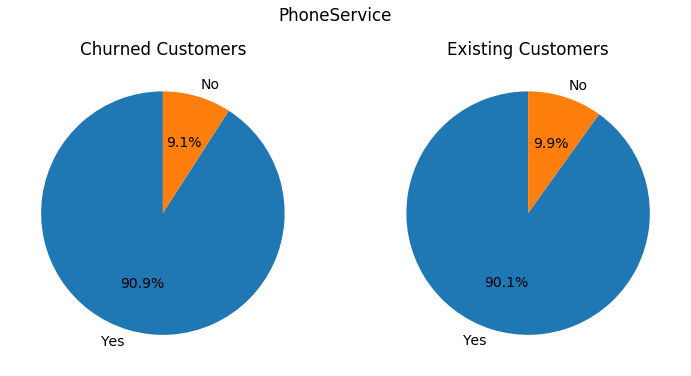

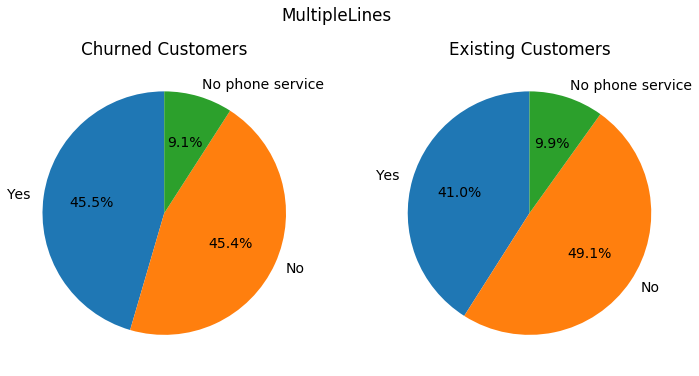

In [75]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [12, 6]})
for col_name in phone_column_names:
    churned_count = df[(df["Churn"] == "Yes")][col_name].value_counts()
    stayed_count = df[(df["Churn"] == "No")][col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
    ax2.set_title("Existing Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')


The phone service doesn't seem to affect the churn-rate significantly.

#### The Internet Services
For the comparison of the Internet services, customers without the Internet services will be excluded.

In [76]:
internet_column_names = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

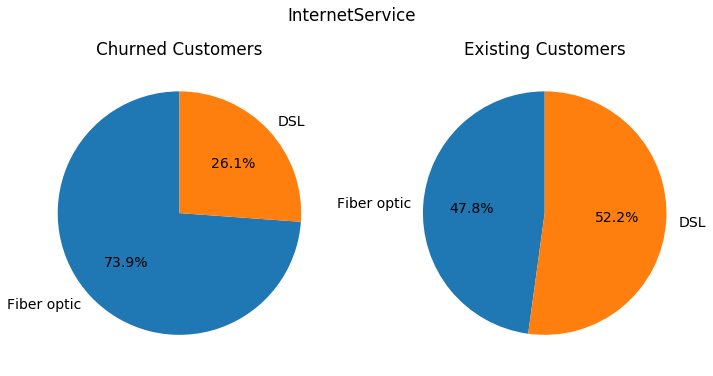

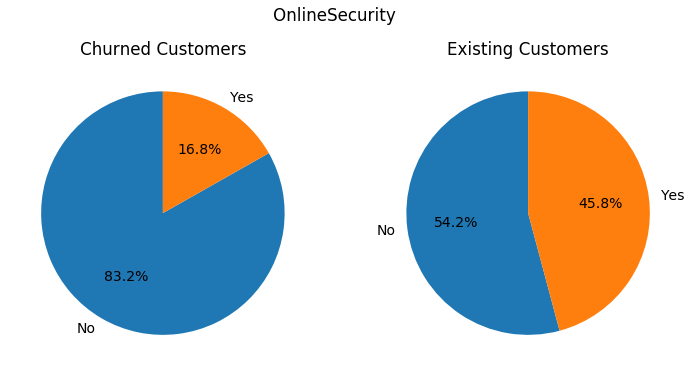

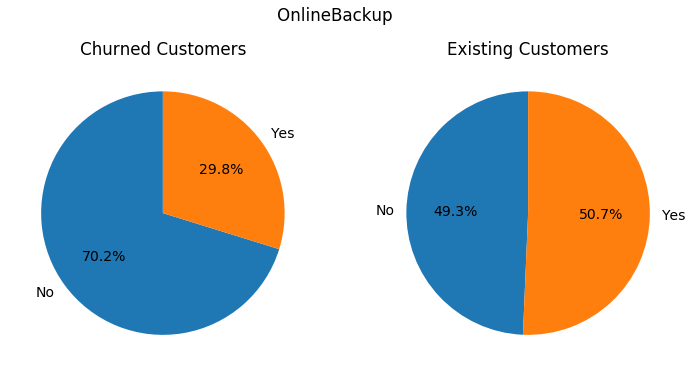

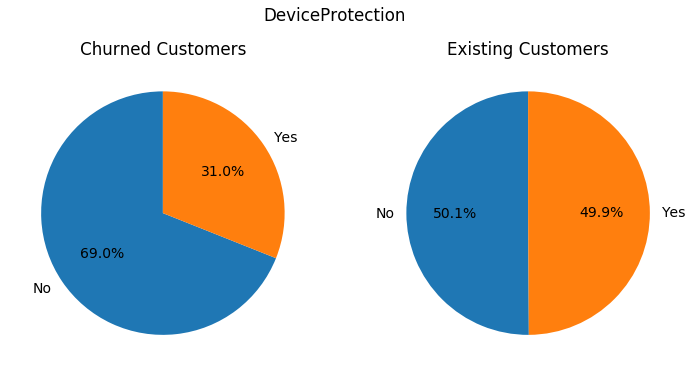

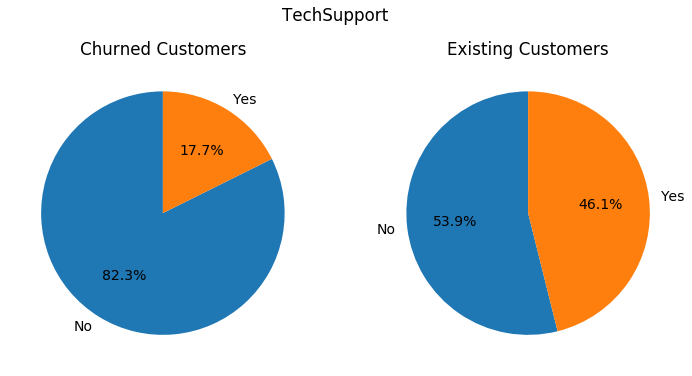

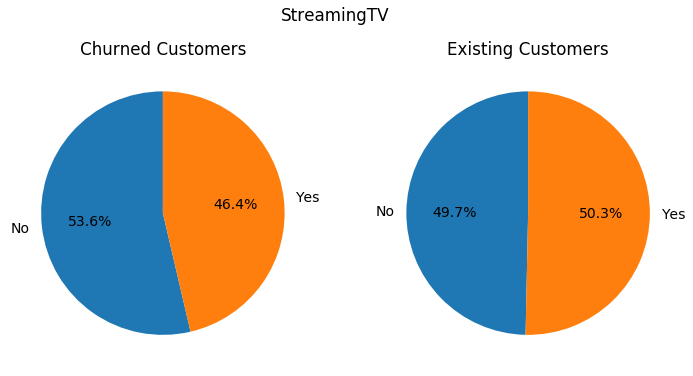

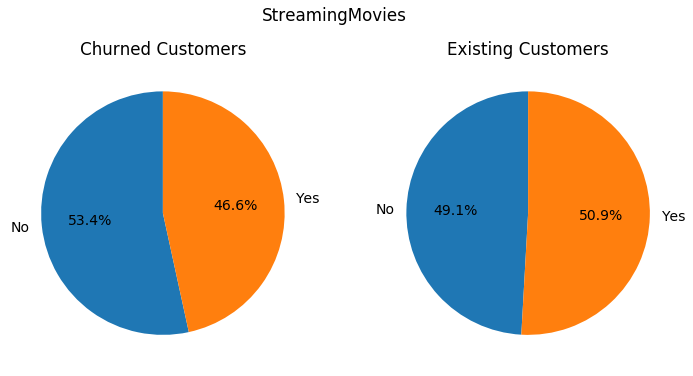

In [77]:
for col_name in internet_column_names:
    churned_count = df[(df["InternetService"] != "No") & (df["Churn"] == "Yes")][col_name].value_counts()
    stayed_count = df[(df["InternetService"] != "No") & (df["Churn"] == "No")][col_name].value_counts()
    
    churned_values = []
    for i in range(len(churned_count.index)):
        churned_values.append(churned_count[i])
    churned_labels = list(churned_count.index)
    
    stayed_values = []
    for i in range(len(stayed_count.index)):
        stayed_values.append(stayed_count[i])
    stayed_labels = list(stayed_count.index)
    
    churned_values_ordered = []
    stayed_values_ordered = []
    ordered_labels = []

    for name in churned_labels:
        churned_idx = churned_labels.index(name)
        stayed_idx = stayed_labels.index(name)
        churned_values_ordered.append(churned_values[churned_idx])
        stayed_values_ordered.append(stayed_values[stayed_idx])
        ordered_labels.append(name)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(121) 
    ax1.pie(churned_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
         startangle=90)
    ax1.set_title("Churned Customers")

    ax2 = fig.add_subplot(122) 
    ax2.pie(stayed_values_ordered, labels=ordered_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
    ax2.set_title("Existing Customers")
    
    plt.suptitle(col_name)
    plt.show()
    
    print('\n')


#### Tenure Length

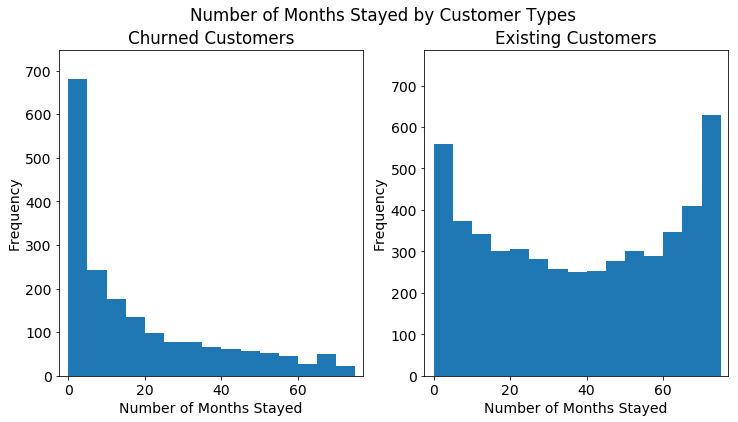

In [80]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [12, 6]})
bin_size = 5 # A size of a bin 
bins = np.arange(0, df[df["Churn"] == "Yes"]["tenure"].max()+bin_size, bin_size) # Array of bins

# Get the maxima values to be used for graphs
largest = df[df["Churn"] == "No"]["tenure"].max() # Max value of the tenure column
bin_numbers = (math.ceil(largest/(bin_size * 10)) * 10) # Calculate the number of bins to be graphed. A bit hacky.
count_churned, division_churned = np.histogram(df[df["Churn"] == "Yes"]["tenure"], bin_numbers) # Get the histogram raw data for the churned customers
count_stayed, division_stayed = np.histogram(df[df["Churn"] == "No"]["tenure"], bin_numbers) # Get the histogram raw data for the current customers

max_count_churned = count_churned.max()
max_count_stayed = count_stayed.max()
max_division_churned = division_churned.max()
max_division_stayed = division_stayed.max()

max_count_val = max_count_churned if max_count_churned >= max_count_stayed else max_count_stayed
max_division_val = max_division_churned if max_division_churned >= max_division_stayed else max_division_stayed

ylim_churned = max_count_churned * 1.1 # Multiply by 1.1 to give the graph a slightly more head room
ylim_stayed = max_count_stayed * 1.1 # Multiply by 1.1 to give the graph a slightly more head room

max_count_val = round(max_count_val, -1) *  1.1 # Multiply by 1.1 to give the graph a slightly more head room
max_division_val = round(max_division_val) + bin_size

# Create graphs

plt.figure()

plt.suptitle("Number of Months Stayed by Customer Types")
plt.subplot(1, 2, 1)
plt.hist(data=df[df["Churn"] == "Yes"], x="tenure", bins=bins)
plt.title("Churned Customers")
plt.xlabel("Number of Months Stayed")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, ylim_churned)

plt.subplot(1, 2, 2)
plt.hist(data=df[df["Churn"] == "No"], x="tenure", bins=bins)
plt.title("Existing Customers")
plt.xlabel("Number of Months Stayed")
plt.ylabel("Frequency")
plt.xlim(-2.5, max_division_val)
plt.ylim(0, ylim_stayed);